<h1><span>Sequence Analysis Part 1 (Basics)</span></h1>

This "Part 1" is a collection of Python-based example codes focussing on sequence analysis on a very basic level (see <a name="TOC">TOC</a>). It is motivated by the many jobs descriptions currently online for genome analysis, next-gen-sequencing (NGS) advances and my fascination towards life science in general. Check out my website (www.bio-century.net) for demos, literature recommendations, links to data bases and further inspirations. Apologies for the code often being a little sloppy and "easy-going". Due to a limited time frame, priorities were set to "progress & visualization" instead of "finding the most efficient solution" :) <br>
Whenever a function or method is developed to fulfill the goals, it is outsources into the subfolder "Part01", take a look and have fun.

# Table of Contents
0. [Reference Table](#ReferenceTable)
1. [First Steps in Sequence Analysis (Groundwork)](#FirstStepsInSequenceAnalysis)
   1. [Color Strings in Terminal Output](#ColoringStrings)
   2. [Computation of Complement, Reverse and Reverse Complement of ssDNA](#ComplRevRevComplssDNA)
   3. [Identification of Sequences of Interest within a Target Sequence](#IdentOfSOIsInTargetSeq)
   4. [Identification of Multiple Sequences of Interest within a Target Sequence](#IdentMultipleOfSOIsInTargetSeq)
   5. [Working with k-mers](#WorkingWithKmers)
2. [Set Up a simple Graphical User Interface (GUI)](#SetUpSimpleGUI)

3. [.html-Export of Code](#htmlExportOfCode)

# 0. <a name="ReferenceTable"> Reference Table</a>

| Tag or Variable | Meaning              |
|-----------------|----------------------|
| mySequence      | Target Sequence      |
| mySOI           | Sequence of Interest |
| ssDNA           | single-stranded DNA  |

# 1. <a name="FirstStepsInSequenceAnalysis"> First Steps in Sequence Analysis (Groundwork)</a>

## 1.1 <a name="ColoringStrings">Color Strings in Terminal Output</a>

Goal:
1. Load a target DNA-sequence ("mySequence") from external file
2. split the DNA at first incidence of a dedicated subpart ("mySOI") and
3. colorprint a for visualization purposes.

In [1]:
# sources
# - https://www.bioinformatics.org/sms2/random_dna.html
# - https://pkg.go.dev/github.com/whitedevops/colors

# include packages
from ExternalPackages.TerminalColors import TerminalColors

mySOI="CGCCAAAAA"

# load file line-by-line
with open('./Part01Data/01_01_SeqOfInterest.txt') as f:
    myLines = f.readlines()

# find mySO, split and color it
for ii, mySequence in enumerate(myLines):
    SOI_POS = mySequence.upper().rfind(mySOI)
    print(mySequence[:SOI_POS - 1]
          + f"{TerminalColors.Green}"
          + mySequence[SOI_POS:SOI_POS + len(mySOI)].upper()
          + f"{TerminalColors.Default}", end = '\n')
    print(" "*(SOI_POS - 1)
          + f"{TerminalColors.LightBlue}"
          + mySequence[SOI_POS:SOI_POS + len(mySOI)].upper()
          + f"{TerminalColors.Default}" + mySequence[SOI_POS + 1:], end = '')

ctgggactctagctgatccacccgcctagggcagcacacataggacgtagctCGCCAAAAA
                                                    CGCCAAAAAgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc

## 1.2 <a name="ComplRevRevComplssDNA">Computation of Complement, Reverse and Reverse Complement of ssDNA</a>

Goal: <br>
To determine all modalities of a DNA-single-strand sequence, i.e.
1. the complement-,
2. the reverse- as well as
3. the reverse-complement-strand

and visualize them.

In [2]:
# sources
# - https://www.bioinformatics.org/sms2/random_dna.html

# include packages
from tkinter import *
from tkinter.ttk import *
from ExternalPackages.TerminalColors import TerminalColors
import Part01.A_Groundwork as Groundwork

mySequenceInput      = "ctgggactctagctgatccacccgcctagggcagcacacataggacgtagctgcgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc"
mySequence           = mySequenceInput.upper()
myNumberOfSOIs       = 3
mySOI                = [""] * myNumberOfSOIs
myColors             = [""] * myNumberOfSOIs
mySequenceColored    = [""] * myNumberOfSOIs
myColorsDNA          = [TerminalColors.Green, TerminalColors.Yellow, TerminalColors.Blue, TerminalColors.Magenta]
myDefaultColor       = TerminalColors.Default

returnSeq = Groundwork.ComplRev(mySequence,"Sequence")
mySequenceColoredDNA = Groundwork.ColorDNA(returnSeq, myColorsDNA, myDefaultColor)
print("Sequence: \t \t", mySequenceColoredDNA, end = '\n')
print("\t \t \t", ''.join('|' for i in returnSeq), end = '\n')

returnSeq = Groundwork.ComplRev(mySequence,"SequenceComplement")
mySequenceColoredDNA = Groundwork.ColorDNA(returnSeq, myColorsDNA, myDefaultColor)
print("Complement: \t \t", mySequenceColoredDNA, end = '\n')
print("")

returnSeq = Groundwork.ComplRev(mySequence,"SequenceReverse")
mySequenceColoredDNA = Groundwork.ColorDNA(returnSeq, myColorsDNA, myDefaultColor)
print("Reverse: \t \t", mySequenceColoredDNA, end = '\n')
print("\t \t \t", ''.join('|' for i in returnSeq), end = '\n')

returnSeq = Groundwork.ComplRev(mySequence,"SequenceReverseComplement")
mySequenceColoredDNA = Groundwork.ColorDNA(returnSeq, myColorsDNA, myDefaultColor)
print("Reverse Complement: \t", mySequenceColoredDNA, end = '\n')

Sequence: 	 	 CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
	 	 	 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Complement: 	 	 GACCCTGAGATCGACTAGGTGGGCGGATCCCGTCGTGTGTATCCTGCATCGACGCGGTTTTTCTGCTTGGGTGGTACGGGTCTGCGTAGACCGATTCGAG

Reverse: 	 	 CTCGAATCGGTCTACGCAGACCCGTACCACCCAAGCAGAAAAACCGCGTCGATGCAGGATACACACGACGGGATCCGCCCACCTAGTCGATCTCAGGGTC
	 	 	 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Reverse Complement: 	 GAGCTTAGCCAGATGCGTCTGGGCATGGTGGGTTCGTCTTTTTGGCGCAGCTACGTCCTATGTGTGCTGCCCTAGGCGGGTGGATCAGCTAGAGTCCCAG


## 1.3 <a name="IdentOfSOIsInTargetSeq">Identification Sequences of Interest within a Target Sequence</a>

Goal: To identify and mark the the position of a SOI (mySOI) in a given target sequence (mySequence). The return "positionsSOI" shall be
1. 1 if the respective base at position ii of the sequence "mySequence" is part of mySOI
2. \>1 if two mySOI-regions overlap and
3. 0 otherwise.

In [1]:
# sources
# - https://www.bioinformatics.org/sms2/random_dna.html

# include packages
from ExternalPackages.TerminalColors import TerminalColors
import Part01.A_Groundwork as Groundwork

mySequenceInput      = "ctgggactctagctgatccacccgcctagggcagcacacataggacgtagctgcgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc"
mySequence           = mySequenceInput.upper()
mySOI                = "GG"

myCount, mySOIPositions = Groundwork.SOIPositions(mySequence, mySOI, "countchain")
myColor                 = TerminalColors.Green
myDefaultColor          = TerminalColors.Default

mySequenceColored       = Groundwork.ColorTheSeq(mySequence, mySOIPositions, myColor, myDefaultColor)
mySOIPositionsColored   = Groundwork.ColorTheSeq(mySOIPositions, mySOIPositions, myColor, myDefaultColor)

print("mySequence: \t \t \t " + mySequenceColored, end = "\n")
print("mySOIPositions: \t \t " + mySOIPositionsColored, end = '\n')
labelNum, labelX = Groundwork.SeqNumberGen(mySequence, 10)
print("\t\t\t\t " + labelNum, end = '\n')
print("\t\t\t\t " + labelX, end = '\n')
myCount, mySOIPositionsIndices = Groundwork.SOIPositions(mySequence, mySOI, "indices")
print("mySOIPositions as indices: \t", mySOIPositionsIndices, end = "\n")

mySequence: 	 	 	 CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOIPositions: 	 	 0012100000000000000000000000121000000000001100000000000000000000000000000000000000000000001100000000
				 1234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
				 ---------|---------|---------|---------|---------|---------|---------|---------|---------|---------x
mySOIPositions as indices: 	 [2, 3, 28, 29, 42, 90]


## 1.4 <a name="IdentMultipleOfSOIsInTargetSeq">Identification of Multiple Sequences of Interest within a Target Sequence</a>

Goal:

To generalize the algorithm above. The positions of 3 given SOIs (mySOIs) shall be
1. identified in a target sequence (mySequence),
2. labelled individually (green, blue and yellow) and
3. a character of the target sequence shall be colored in red, if there is an overlap between the same or different SOIs.

In [1]:
# include packages
from ExternalPackages.TerminalColors import TerminalColors
import Part01.A_Groundwork as Groundwork

dictTargetSequence                  = {}
dictSOIs                            = {}
mySequenceInput                     = "ctgggactctagctgatccacccgcctagggcagcacacataggacgtagctgcgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc"
dictTargetSequence["mySequence"]    = mySequenceInput.upper()
dictSOIs["mySOI01"]                 = "AGG"
dictSOIs["mySOI02"]                 = "GAC"
dictSOIs["mySOI03"]                 = "CTAG"

SOICount                            = [0]  * len(dictSOIs)
SOIPositions                        = [0]  * len(dictSOIs)
SOIPositionsIndices                 = []
mySequenceColored                   = [""] * len(dictSOIs)
myColors                            = [TerminalColors.Green, TerminalColors.Blue, TerminalColors.Yellow]
myDefaultColor                      = TerminalColors.Default
myColorWarning                      = TerminalColors.Red

dictSOIPositions                    = {}
dictSOIPositionsIndices             = {}



labelNum, labelX = Groundwork.SeqNumberGen(dictTargetSequence["mySequence"], 10)
print("\t\t\t  " + labelNum, end = '\n')
print("\t\t\t  " + labelX, end = '\n')

for count, value in enumerate(dictSOIs):
    SOICount[count], dictSOIPositions[value]        = Groundwork.SOIPositions(dictTargetSequence["mySequence"], dictSOIs[value], "countchain")
    SOICount[count], dictSOIPositionsIndices[value] = Groundwork.SOIPositions(dictTargetSequence["mySequence"], dictSOIs[value], "indices")
    mySequenceColored[count]                        = Groundwork.ColorTheSeq(dictTargetSequence["mySequence"], dictSOIPositions[value], myColors[count], myDefaultColor)
    SOIPositions[count]                             = dictSOIPositions[value]
    print(value + ": \t \t ", mySequenceColored[count], end = '\n')

# print(dictSOIPositions)
mySequenceColored, mySOIPositionsTotalColored, mySOIPositionsTotal = Groundwork.ColorTheSeqMerge(dictTargetSequence["mySequence"],
                                                                                                 SOIPositions,
                                                                                                 myColors,
                                                                                                 myDefaultColor,
                                                                                                 myColorWarning)



print("-" * 126, end = '\n')
print("mySOIs (total): \t ", mySequenceColored, end = '\n')
print("mySOIPositions (total):  ", mySOIPositionsTotalColored, end = '\n')
print("-" * 126, end = '\n')
print("mySOI01 Indices:\t ", dictSOIPositionsIndices["mySOI01"])
print("mySOI02 Indices:\t ",dictSOIPositionsIndices["mySOI02"])
print("mySOI03 Indices:\t ",dictSOIPositionsIndices["mySOI03"])

			  1234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
			  ---------|---------|---------|---------|---------|---------|---------|---------|---------|---------x
mySOI01: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI02: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI03: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
------------------------------------------------------------------------------------------------------------------------------
mySOIs (total): 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOIPositions (total):   0000111011110000000000000112210000000000011211000000000000000011100000000000000001110000000000000000
---------------------------------------------------------------------

## 1.4 <a name="DataStorage">Data Grouping and Storage</a>

For further sequence analysis it might be useful to establish data containers in order to group different variables and parameter that belong together. One possibility in Python is to set up a collection (namedtuples). Please keep in mind, that long target sequences should be excluded and stored externally and then should be assigned by a nametag identifyer.

In [14]:
# sources
# https://stackoverflow.com/questions/9713352/python-creating-a-list-with-a-unique-automatically-generated-name
# https://www.pythonpool.com/python-string-to-variable-name/
# https://www.pythonforbeginners.com/basics/convert-string-to-variable-name-in-python

from collections import namedtuple
from ExternalPackages.TerminalColors import TerminalColors
import Part01.A_Groundwork as Groundwork

dictTargetSequence                  = {}
dictSOIs                            = {}

mySOI                               = []
dictTargetSequence["mySequence01"]  = "ctgggactctagctgatccacccgcctagggcagcacacatagg".upper()
dictTargetSequence["mySequence02"]  = "acgtagctgcgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc".upper()
dictSOIs["mySOI01"]                 = "AGG"
dictSOIs["mySOI02"]                 = "GAC"
dictSOIs["mySOI03"]                 = "CTAG"
SOICount                            = [0]  * len(dictSOIs)
SOIPositions                        = [0]  * len(dictSOIs)

dictIndices                         = {}
mySequenceColored                   = [""] * len(dictSOIs)

myColors                            = [TerminalColors.Green, TerminalColors.Blue, TerminalColors.Yellow]
myColorsStr                         = ["Green", "Blue", "Yellow","Green", "Blue", "Yellow"] # Terminal Colors are tricky to store. Using identifiers instead
myDefaultColor                      = TerminalColors.Default
myColorWarning                      = TerminalColors.Red

mySOIsAndIndices                    = namedtuple("myDataCollection","mySequenceKey mySequenceValue mySOIKey mySOIValue myColors myIndices")
mySOIsAndIndices_array              = []
mySeqPos                            = []

dictSOIPositions                    = {}
dictSOIPositionsIndices             = {}

for mySeqsKey in dictTargetSequence:
    kk = 0
    for myCurrentKey in dictSOIs:
        mySOIsAndIndices_array.append(mySOIsAndIndices(mySeqsKey, dictTargetSequence[mySeqsKey], myCurrentKey, dictSOIs[myCurrentKey], myColorsStr[kk], []))
        kk += 1



for countTargetSeq, valueTargetSeq in enumerate(dictTargetSequence):
    print(valueTargetSeq)
    labelNum, labelX = Groundwork.SeqNumberGen(dictTargetSequence[valueTargetSeq], 10)
    print("\t\t\t  " + labelNum, end = '\n')
    print("\t\t\t  " + labelX, end = '\n')
    for count, value in enumerate(dictSOIs):
        SOICount[count], dictSOIPositions[value]        = Groundwork.SOIPositions(dictTargetSequence[valueTargetSeq], dictSOIs[value], "countchain")
        SOICount[count], dictSOIPositionsIndices[value] = Groundwork.SOIPositions(dictTargetSequence[valueTargetSeq], dictSOIs[value], "indices")
        mySequenceColored[count]                        = Groundwork.ColorTheSeq(dictTargetSequence[valueTargetSeq], dictSOIPositions[value], myColors[count], myDefaultColor)
        SOIPositions[count]                             = dictSOIPositions[value]
        print(value + ": \t \t ", mySequenceColored[count], end = '\n')
    print("\n")

for SOIs in mySOIsAndIndices_array:
    for ii in range(len(SOIs.mySequenceValue) - len(SOIs.mySOIValue)):
        if SOIs.mySequenceValue[ii:ii + len(SOIs.mySOIValue)] == SOIs.mySOIValue:
            SOIs.myIndices.append(ii)
    print(SOIs)

mySequence01
			  12345678901234567890123456789012345678901234
			  ---------|---------|---------|---------|----
mySOI01: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG
mySOI02: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG
mySOI03: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG


mySequence02
			  12345678901234567890123456789012345678901234567890123456
			  ---------|---------|---------|---------|---------|------
mySOI01: 	 	  ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI02: 	 	  ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI03: 	 	  ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC


myDataCollection(mySequenceKey='mySequence01', mySequenceValue='CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG', mySOIKey='mySOI01', mySOIValue='AGG', myColors='Green', myIndices=[27])
myDataCollection(mySequenceKey='mySequence01', mySequenceValue='CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG', mySOIKey='mySOI02', mySOIValue='GAC', myColors='Blue', myIndic

The accessibility of the namedtuple-fields can be a little tricky though. Here are two possibilities to do that:

In [22]:
search_item=["mySequence02", "mySOI02", "myIndices"]
search_item=["mySequence02", "mySOI02", "myColors"]

index_array=(list(dictTargetSequence.keys()).index(search_item[0])) * len(dictSOIs) + (list(dictSOIs.keys()).index(search_item[1]))
print("You are asking for the value of \"" + search_item[2] + "\" for the sequence of interest \"" + search_item[1] + "\" within the target sequence \"" + search_item[0] + "\".")
print("----------------------------------------------------------------------------------------------------------------------------------")
res = mySOIsAndIndices_array.__getitem__(index_array).__getitem__(mySOIsAndIndices._fields.index(search_item[2]))
print("The value is as follows: \t ", res)

You are asking for the value of "myColors" for the sequence of interest "mySOI02" within the target sequence "mySequence02".
----------------------------------------------------------------------------------------------------------------------------------
The value is as follows: 	  Blue


In [23]:
search_item=["mySOIKey", "mySOI02"]

print("All items fulfilling the requirements:")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
for SOIs in mySOIsAndIndices_array:
    test_data = SOIs.__getitem__(mySOIsAndIndices._fields.index(search_item[0]))
    if test_data == search_item[1]:
        res = SOIs.__getitem__(mySOIsAndIndices._fields.index(search_item[0]))
        print(SOIs)

All items fulfilling the requirements:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
myDataCollection(mySequenceKey='mySequence01', mySequenceValue='CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG', mySOIKey='mySOI02', mySOIValue='GAC', myColors='Blue', myIndices=[4])
myDataCollection(mySequenceKey='mySequence02', mySequenceValue='ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC', mySOIKey='mySOI02', mySOIValue='GAC', myColors='Blue', myIndices=[18, 37])


# 2. <a name="SetUpSimpleGUI">Set Up a simple Graphical User Interface (GUI)</a>

Goal:

Set up a simple first draft of a Grahical User Interface (GUI) for future applications. The GUI should
1. analyse a given DNA-Sequence with respect to 3 mySOIs and color code the respective positions in the target sequence
2. save the results in an external file
3. look fancy
4. provide space for a next analysis step. Prefered is a tab-design of the GUI.

mySOIs (total): 	 	 CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACA
mySOIPositions (total) : 	 00001110111100000000000001122100000000


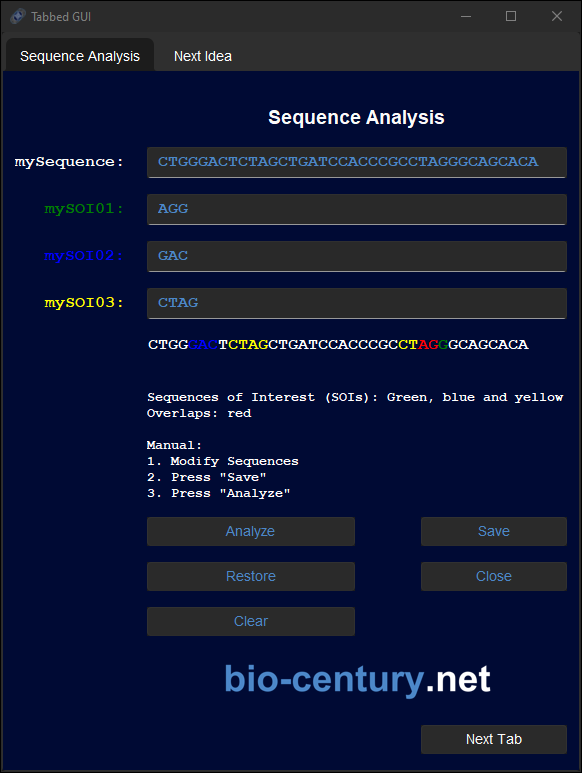

In [1]:
# sources
# https://github.com/rdbende/Azure-ttk-theme
# https://stackoverflow.com/questions/18052395/array-of-buttons-in-python
# https://www.tutorialspoint.com/how-to-save-the-contents-of-a-textbox-in-tkinter
# https://www.plus2net.com/python/tkinter-grid.php
# https://stackoverflow.com/questions/17251016/python-tkinter-how-to-change-the-windows-border-color
# https://learn.microsoft.com/en-us/windows/win32/api/dwmapi/ne-dwmapi-dwmwindowattribute
# https://www.tutorialspoint.com/how-to-change-the-color-of-certain-words-in-a-tkinter-text-widget
# https://www.javatpoint.com/python-tkinter-text
# https://www.pythontutorial.net/tkinter/tkinter-validation/
# https://www.delftstack.com/howto/python-tkinter/tkinter-tabs/
# https://stackoverflow.com/questions/53461066/python-showing-next-tab-by-pressing-a-button
# https://stackoverflow.com/questions/70224682/is-there-a-way-in-tkinter-to-left-align-tabs-notebook


# convert BCN-image to .ico in order to make image applicable as a logo for the window frame
from PIL import Image
logo = Image.open("./icons/logoBCNicon.png")
logo.save("./icons/logoBCNicon.ico", format = 'ICO')


# include packages
from tkinter import *
from tkinter.ttk import *
import shutil
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import TKinterModernThemes as TKMT
import Part01.A_Groundwork as Groundwork
import Part01.B_SimpleTabbedGUI as SimpleTabbedGUI
from ExternalPackages.TerminalColors import TerminalColors
from tkinter import Text, END
import numpy as np
import time
from IPython.display import Image as ImageIPython


# define colors and constants
myForegroundColor          = "#4c87c8"
myBackgroundColor          = "#000a34"
dictSequence               = {}
mySOI                      = []
mySequenceInput            = "ctgggactctagctgatccacccgcctagggcagcaca"
dictSequence["mySequence"] = mySequenceInput.upper()
dictSequence["mySOI01"]    = "AGG"
dictSequence["mySOI02"]    = "GAC"
dictSequence["mySOI03"]    = "CTAG"
myInput                    = [""] * len(dictSequence)
myNumberLabelBlank         = 30
myLabelBlank               = [""] * myNumberLabelBlank
myColors                   = [TerminalColors.Green, TerminalColors.Blue, TerminalColors.Yellow]
myDefaultColor             = TerminalColors.Default
myColorWarning             = TerminalColors.Red
myDefaultColorTextBox      = "white"
myColorWarningTextBox      = "red"
myColorsTextBox            = ["green", "blue", "yellow"]


# define some functions which are hard to migrate to B_SimpleTabbedGUI.py (due to run-command)
def AnalyseSeq(myText, myNumberOfSOIs, mySequence, mySOIPositions, myColorsTextBox,
               myDefaultColorTextBox, myColorWarningTextBox, myBackgroundColor, tab1, myColumnCount):
    %run "./Part01Data/02_Sequence.py"
    for ii in range(myNumberOfSOIs):
        myCurrentKey    = list(dictSequence.keys())[ii + 1]
        myCount[ii], mySOIPositions[ii] = Groundwork.SOIPositions(dictSequence["mySequence"], dictSequence[myCurrentKey], "countchain")
    myText.delete
    myTextnew= Text(tab1, height = 2, width = 35, background = myBackgroundColor, highlightthickness = 0,
                    borderwidth = 0, font = ('Courier New', 12, 'bold'))
    myTextnew = Groundwork.ColorTheSeqMergeGUI(myTextnew, dictSequence["mySequence"], mySOIPositions, myColorsTextBox,
                                               myDefaultColorTextBox, myColorWarningTextBox, myBackgroundColor, tab1,
                                               myColumnCount)
    myTextnew.grid(row = myColumnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E)

def LoadDataset():
    restoreExampleDataset()
    time.sleep(0.1)
    %run "./Part01Data/02_ExampleDataset.py"
    for ii in range(0, len(dictSequence)):
        currentKey    = list(dictSequence.keys())[ii]
        currentValue  = list(dictSequence.values())[ii]
        myInput[ii].delete(0, END)
        myInput[ii].insert(0, currentValue)

def restoreExampleDataset():
    shutil.copy("./Part01Data/02_ExampleDataset.py", "./Part01Data/02_Sequence.py")


# initialize GUI
root = tk.Tk()

# set graphical appearance
root.configure(background = myBackgroundColor)
Groundwork.DarkTitleBar(root)
root.title('Tabbed GUI')
root.tk.call("source", "./_themes/Sun-Valley-ttk-theme-main/sv.tcl")
root.tk.call("set_theme", "dark")
root.iconbitmap("./icons/logoBCNicon.ico")
ttk.Style().configure("RB.TButton", foreground = myForegroundColor)

# create a tab control that manages multiple tabs
tabsystem = ttk.Notebook(root)

# create new tabs using frame widget
tab1 = Frame(tabsystem)
tab2 = Frame(tabsystem)

# initialize some blank labels used for GUI design
for ii in range(0, len(myLabelBlank)):
    myLabelBlank[ii]   = ttk.Label(tab1, text = "   ", background = myBackgroundColor)

# set style
s = ttk.Style(root)
s.configure("TFrame",        background = myBackgroundColor, foreground = myBackgroundColor)
s.configure("TNotebook",     background = myBackgroundColor, foreground = myBackgroundColor)
s.configure("TNotebook.Tab", background = myBackgroundColor, foreground = "white")


# load (previous) dataset
%run "./Part01Data/02_Sequence.py"


# set top label
columnCount = 0; blankCount = 0
myLabelBlank[blankCount].grid(row = columnCount, column = 0); blankCount  += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 2); blankCount  += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 4); blankCount  += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 6); columnCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 8); columnCount += 1

myLabel = tk.Label(tab1, text = "Sequence Analysis", font = ('Arial', 14, 'bold'), bg = myBackgroundColor)
myLabel.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E)
columnCount += 1
blankCount  += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0)
myValidation                    = [] * 4

for ii in range(len(dictSequence)):
    blankCount += 1
    myLabelBlank[blankCount+ii].grid(row = columnCount, column = 2)
    columnCount += 1
    currentKey    = list(dictSequence.keys())[ii]
    currentValue  = list(dictSequence.values())[ii]
    if ii == 0:
        myLabel     = ttk.Label(tab1, text = currentKey + ": ", anchor="e", justify = "left",
                                font = ('Courier New', 12, 'bold'), 
                                foreground = "white", background = myBackgroundColor)
    else:
        myLabel     = ttk.Label(tab1, text = currentKey + ": ", anchor = "e", justify = "left",
                                font = ('Courier New', 12, 'bold'), background = myBackgroundColor,
                                foreground = myColorsTextBox[ii - 1])
    myLabel.grid(row = columnCount, column = 1, sticky = tk.W + tk.E)
    myInput[ii] = ttk.Entry(tab1, width = 40, style = "EntryStyle.TEntry",
                                font = ('Courier New', 12, 'bold'),
                                foreground = myForegroundColor, background = myBackgroundColor)
    myInput[ii].insert("end", dictSequence[currentKey])
    myInput[ii].grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5)
    blankCount += 1; columnCount += 1
    myLabelBlank[blankCount + ii].grid(row = columnCount, column = 2)

columnCount += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1

myNumberOfSOIs       = len(dictSequence) - 1
myCount              = [0] * myNumberOfSOIs
mySOIPositions       = [0] * myNumberOfSOIs
mySequenceColored    = [""] * myNumberOfSOIs
mySequence           = dictSequence["mySequence"]

columnCount  += 1
for ii in range(myNumberOfSOIs):
    currentKey                    = list(dictSequence.keys())[ii+1]
    myCount[ii], mySOIPositions[ii] = Groundwork.SOIPositions(mySequence, dictSequence[currentKey], "countchain")
    mySequenceColored[ii]           = Groundwork.ColorTheSeq(mySequence, mySOIPositions[ii], myColors[ii], myDefaultColor)

mySequenceColored, mySOIPositionsTotalColored, mySOIPositionsTotal = Groundwork.ColorTheSeqMerge(mySequence, mySOIPositions, myColors,
                                                                                          myDefaultColor, myColorWarning)
print("mySOIs (total): \t \t", mySequenceColored, end = '\n')
print("mySOIPositions (total) : \t", mySOIPositionsTotalColored, end = '\n')
myLabel = ttk.Label(text = mySequence, font=('Arial', 14, 'bold'))


# write colored result in textfield of GUI
myText = Text(tab1, height = 3, width = 35, background = myBackgroundColor, highlightthickness = 0,
              borderwidth = 0, font = ('Courier New', 12, 'bold'))
AnalyseSeq(myText, myNumberOfSOIs, mySequence, mySOIPositions, myColorsTextBox,
           myDefaultColorTextBox, myColorWarningTextBox, myBackgroundColor, tab1, columnCount)
myColumnCountAnalysisStatic = columnCount; columnCount += 1


# imprint user manual
columnCount  += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
myLabelLegend  = ttk.Label(tab1, text = "Sequences of Interest (SOIs): Green, blue and yellow", anchor = "w", justify = "left",
                             font = ('Courier New', 10, 'bold'), background = myBackgroundColor, foreground = "white")
myLabelLegend.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E); columnCount += 1
myLabelLegend  = ttk.Label(tab1, text = "Overlaps: red", anchor = "w", justify = "left", font = ('Courier New', 10, 'bold'),
                             background = myBackgroundColor, foreground = "white")
myLabelLegend.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E)
columnCount  += 1; columnCount += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
myLabelMan     = ttk.Label(tab1,text = "Manual: ", anchor = "w", justify = "left", font = ('Courier New', 10, 'bold'),
                           background = myBackgroundColor, foreground = "white")
myLabelMan.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E); columnCount += 1
myLabelMan     = ttk.Label(tab1,text = "1. Modify Sequences", anchor = "w", justify="left", font = ('Courier New', 10, 'bold'),
                           background = myBackgroundColor, foreground = "white")
myLabelMan.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E); columnCount += 1
myLabelMan     = ttk.Label(tab1,text = "2. Press \"Save\"", anchor = "w", justify = "left", font = ('Courier New', 10, 'bold'),
                           background = myBackgroundColor, foreground = "white")
myLabelMan.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E); columnCount += 1
myLabelMan     = ttk.Label(tab1,text = "3. Press \"Analyze\"", anchor = "w", justify = "left", font = ('Courier New', 10, 'bold'),
                           background = myBackgroundColor, foreground = "white")
myLabelMan.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E)
columnCount  += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1


# Set control buttons and define actions
myButtonAnalysis = ttk.Button(tab1,text = "Analyze", style = "RB.TButton", command = lambda: AnalyseSeq(myText, myNumberOfSOIs,
                                                                                                        mySequence, mySOIPositions,
                                                                                                        myColorsTextBox, myDefaultColorTextBox,
                                                                                                        myColorWarningTextBox, myBackgroundColor,
                                                                                                        tab1, myColumnCountAnalysisStatic))
myButtonAnalysis.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 3, sticky = tk.W + tk.E)
myButtonSave  = ttk.Button(tab1, text = "Save", style = "RB.TButton", command = lambda: SimpleTabbedGUI.SaveSequence(dictSequence, myInput))
myButtonSave.grid(row = columnCount, column = 7, sticky = tk.W + tk.E)

columnCount += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
myButton      = ttk.Button(tab1, text = "Restore", style = "RB.TButton", command = lambda: LoadDataset())
myButton.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 3, sticky = tk.W + tk.E)
myButtonClose = ttk.Button(tab1, text = "Close", style = "RB.TButton", command = root.destroy)
myButtonClose.grid(row = columnCount, column = 7, sticky = tk.W + tk.E)

columnCount += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
myButtonClear = ttk.Button(tab1, text = "Clear", style = "RB.TButton", command = lambda: SimpleTabbedGUI.ClearTextandFields(dictSequence, myInput))
myButtonClear.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 3, sticky = tk.W + tk.E)
columnCount += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1


# set logo bio-century.net
myImage        = Image.open('./icons/logoBCN.png')
imageResized = myImage.resize((288, 47))
myIcon=ImageTk.PhotoImage(imageResized)
columnCount  += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0)
myLogoLabel    = ttk.Label(tab1, image = myIcon, padding = 5, background = myBackgroundColor)
myLogoLabel.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5)

columnCount += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
myButtonNext   = ttk.Button(tab1, text="Next Tab", command = lambda: tabsystem.select(tab2))
myButtonNext.grid(row=columnCount, column=7, sticky = tk.W + tk.E); columnCount += 1
columnCount  += 1; blankCount += 1
myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1


# set "Next Idea" tab
label2nd = Label(tab2, text = "Here is some space for a new idea!", background = myBackgroundColor)
label2nd.grid(column = 1, row = 1, padx = 170,pady = 250)
tabsystem.add(tab1, text = 'Sequence Analysis')
tabsystem.add(tab2, text = 'Next Idea')
tabsystem.grid()

display(ImageIPython(filename = './figures/TabbedGUI.png'))
root.mainloop()

# 3. <a name="WorkingWithKmers">Mutations, Insertions and Deletions</a>

# 4. <a name="WorkingWithKmers">k-mer-Analysis of a Sequence</a>

This section is about the analysis of a target sequence in view of it's k-mer subcomponents. It is a direct preparation to put together small DNA-fragments with overlap in order to get the full picture, as it is required for NGS-data exploration of very large DNA sequences.

# 100. <a name="Appendix">Appendix</a>

## 1. <a name="htmlExportOfCode">.html-Export of Code</a>

In [ ]:
# export code to html
import os
os.system("jupyter nbconvert SequenceAnalysisPart01.ipynb --to html")

0